In [ ]:
!pip install -q kaggle
!pip install -q torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahanandanyamagouda","key":"498546f78a99f00ad40ea083674b241b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cashbowman/ai-generated-images-vs-real-images
!unzip -q ai-generated-images-vs-real-images.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/cashbowman/ai-generated-images-vs-real-images
License(s): Community Data License Agreement - Sharing - Version 1.0
 96% 458M/476M [00:01<00:00, 312MB/s]
100% 476M/476M [00:01<00:00, 402MB/s]


In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [ ]:
data_dir = '/content/dataset'

full_dataset = ImageFolder(data_dir, transform=transform)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
from torchvision.models import resnet18

model = resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 2 classes: AI, Real
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 97.7MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss:.4f}, Accuracy: {100 * correct / total:.2f}%')

Epoch 1/20, Loss: 2.3507, Accuracy: 96.92%
Epoch 2/20, Loss: 0.7089, Accuracy: 99.36%
Epoch 3/20, Loss: 2.9280, Accuracy: 95.63%
Epoch 4/20, Loss: 4.9115, Accuracy: 93.70%
Epoch 5/20, Loss: 3.5454, Accuracy: 93.96%
Epoch 6/20, Loss: 1.9718, Accuracy: 96.53%
Epoch 7/20, Loss: 1.2170, Accuracy: 98.20%
Epoch 8/20, Loss: 2.9727, Accuracy: 95.50%
Epoch 9/20, Loss: 2.9386, Accuracy: 96.53%
Epoch 10/20, Loss: 1.1708, Accuracy: 98.71%
Epoch 11/20, Loss: 2.0980, Accuracy: 97.43%
Epoch 12/20, Loss: 2.1980, Accuracy: 96.66%
Epoch 13/20, Loss: 1.0201, Accuracy: 98.84%
Epoch 14/20, Loss: 0.3834, Accuracy: 99.61%
Epoch 15/20, Loss: 0.2361, Accuracy: 99.61%
Epoch 16/20, Loss: 0.5095, Accuracy: 99.49%
Epoch 17/20, Loss: 1.6274, Accuracy: 97.30%
Epoch 18/20, Loss: 1.7000, Accuracy: 97.56%
Epoch 19/20, Loss: 1.1017, Accuracy: 98.33%
Epoch 20/20, Loss: 0.5281, Accuracy: 99.10%


In [ ]:
model.eval()
all_preds = []
all_labels = []
test_loss, correct, total = 0, 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

avg_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total

print(f'\nTest Accuracy: {accuracy:.2f}%')
print(f'Test Loss: {avg_loss:.4f}')
print('\nClassification Report:')
print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Test Accuracy: 75.38%
Test Loss: 0.8688

Classification Report:
              precision    recall  f1-score   support

   AiArtData       0.83      0.75      0.79       119
     RealArt       0.66      0.76      0.71        76

    accuracy                           0.75       195
   macro avg       0.75      0.76      0.75       195
weighted avg       0.76      0.75      0.76       195



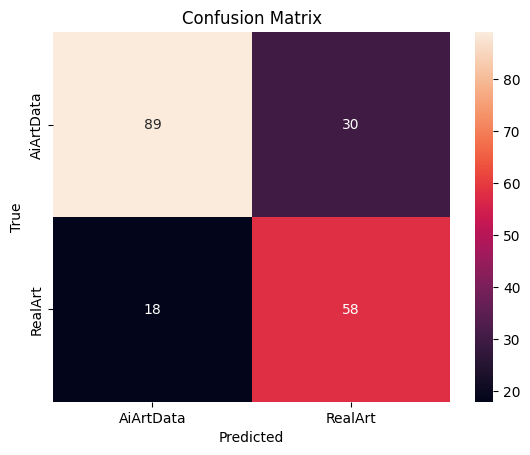

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

Saving Albert-Einstein-generated-by-AI-1024x683.webp to Albert-Einstein-generated-by-AI-1024x683.webp


Predicted Class: AiArtData


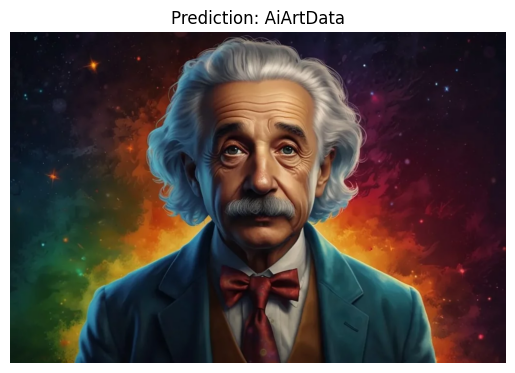

In [ ]:
def predict_image(image_path, model):
    image = Image.open(image_path).convert('RGB')
    img_tensor = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)

    class_name = full_dataset.classes[predicted.item()]
    print(f'Predicted Class: {class_name}')

    plt.imshow(image)
    plt.title(f'Prediction: {class_name}')
    plt.axis('off')
    plt.show()

predict_image(img_path, model)

In [ ]:
def predict_image(image_path, model, transform, class_names, true_label='RealArt'):
    from PIL import Image
    import matplotlib.pyplot as plt

    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)

    predicted_class = class_names[predicted.item()]

    # Display image and prediction
    plt.imshow(image)
    plt.title(f'Prediction: {predicted_class}')
    plt.axis('off')
    plt.show()

    # Accuracy logic
    if true_label is not None:
        true_index = class_names.index(true_label)
        is_correct = (predicted.item() == true_index)
        accuracy = 100.0 if is_correct else 0.0
        print(f"True Label: {true_label}")
        print(f"Predicted Label: {predicted_class}")
        print(f"Accuracy: {accuracy:.2f}%")
    else:
        print(f"Predicted Label: {predicted_class}")
        print("Accuracy: N/A (true label not provided)")

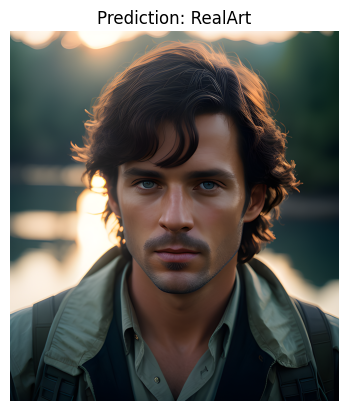

True Label: AiArtData
Predicted Label: RealArt
Accuracy: 0.00%


In [ ]:
predict_image("/content/ai-generated-8189352_1280.png", model, transform, full_dataset.classes,'AiArtData')